In [7]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Lato');
</style>

In [2]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Lato:wght@300');
</style>

In [9]:
def Netflix_theme():
    font = "Lato"
    labelFont = "Lato:wght@300"
    sourceFont = "Lato"
    gridColor = "#43465e"
    # Colors
    main_palette = ["#E50914",
                    "#B20710",
                    "#000000",
                    "#980a0a",
                    "#780909",
                    "#0b0000",
                    "#dedede",
                    "#43465e",
                    ]
    sequential_palette = ["#cfe8f3",
                          "#a2d4ec",
                          "#73bfe2",
                          "#46abdb",
                          "#1696d2",
                          "#12719e",
                          ]
    return {
        "autosize": {
            "type": "fit",
            "contains": "padding"
        },
        "config": {
            "title": {
                "fontSize": 18,
                "font": font,
                "anchor": "start",
                "color": "#ffffff",
                "subtitlefont" : font
            },
            "style": {"guide-label": {"fill": "#fff"}, "guide-title": {"fill": "#fff"}},
            "axisX": {
                "labelColor": "#F5F5F1",
                "titleColor": "#ededed",
                "domain": True,
                "domainColor": gridColor,
                "domainWidth": 0.5,
                "grid": False,
                "labelFont": font,
                "labelFontSize": 12,
                "labelAngle": 0,
                "tickColor": "#43465e",
                "tickSize": 5,
                "titleFont": font,
                "titleFontSize": 12,
                "titlePadding": 10,
                "title": "X Axis Title (units)"
            },
            "axisY": {
                "domain": False,
                "domainColor": "#e4e4e4",
                "grid": True,
                "gridColor": gridColor,
                "gridWidth": 1,
                "labelFont": font,
                "labelFontSize": 12,
                "labelColor": "#F5F5F1",
                "labelAngle": 0,
                "ticks": False,
                "titleFont": font,
                "titleFontSize": 12,
                "titlePadding": 10,
                "title": "Y Axis Title (units)",
                "titleAngle": 0,
                "titleY": -10,
                "titleX": 18
            },
            "legend": {
                "labelColor": "#888c95",
                "titleColor": "#dadada"
            },
            "view": {
                "fill": "#131834",
                #"#43465e",
                "stroke": "transparent"
            },
            "background": "#131834",
            "range": {
                "category": [
                    "#f0e442",
                    "#cc79a7",
                    "#009e73",
                    "#F05039",
                    "#780909",
                    "#0b0000",
                    "#dedede",
                    "#43465e"
                  ],
                "diverging": [
                    "#ff7272",
                    "#e80000",
                    "#c10000",
                    "#973333",
                    "#640000",
                    "#000000"
                  ]
            }
        }
    }


In [10]:
import altair as alt
import pandas as pd

alt.themes.register("netflix_theme", Netflix_theme)
alt.themes.enable("netflix_theme")

ThemeRegistry.enable('netflix_theme')

In [12]:
import altair as alt
import pandas as pd

# Create a DataFrame with the provided data
data = {'Year': [2018, 2019, 2020, 2021, 2022, 2023],
        'Market Size (billion)': [38.56, 42.60, 61.00, 375.10, 444.30, 526.30]}
df = pd.DataFrame(data)

# Define the Netflix color palette
netflix_colors = ["#221f1f", "#b20710", "#e50914", "#f5f5f1"]

# Set the font and background color

# Define the base bar chart (lower chart) with a narrower scale
base_bar = alt.Chart(df).mark_bar(size=20, color=netflix_colors[2]).encode(
    x=alt.X('Year:N', axis=alt.Axis(labelAngle=0, grid=False), title="year"),  # Make x-axis labels horizontal
    y=alt.Y('Market Size (billion):Q', axis=alt.Axis(labelAngle=0, grid=False)),  # Make y-axis labels horizontal
    tooltip=['Year:N', 'Market Size (billion):Q']
).properties(
    width=300,
    height=100,  # Smaller height for the lower chart
)

# Add brush selection to the base bar chart
brush = alt.selection_interval(encodings=['x'])

brush_bar = base_bar.add_params(brush).encode(
    color=alt.condition(brush, alt.value(netflix_colors[2]), alt.ColorValue('#f0dddd'))
)

# Define the base line chart (upper chart)
base_line = alt.Chart(df).mark_line(point={'size': 100, 'color':"#f0e442"}, color="#f0e442").encode(
    x=alt.X('Year:N'),  
    y=alt.Y('Market Size (billion):Q', axis=alt.Axis(labelAngle=0, offset=10), title="market side in billion $"),  # Make y-axis labels horizontal
    tooltip=['Year:N', 'Market Size (billion):Q']
).properties(
    width=300,
    height=300,  # Smaller height for the lower chart
    title=alt.TitleParams(text='Global Video Streaming Market Size (billion)')  # Apply font to the title
)

# Use transform_filter to apply brush selection to the line chart
brush_line = base_line.transform_filter(
    brush
)

combined_chart = alt.vconcat(brush_line, brush_bar)
combined_chart.properties(
    title=['Global Video Streaming Market Size (billion)', '\n\n'])
combined_chart.display()

alt.VConcatChart(...)

In [323]:
#combined_chart.save('market_size.html')

In [324]:
#import pandas as pd
#import chart_studio.plotly as py
#from plotly.graph_objs import *

In [18]:
import altair as alt
import pandas as pd
df = pd.read_csv('/Users/moji/Desktop/interaction/chart:data/netflix_regional_revenue.csv')
df['Time'] = pd.to_datetime(df['Time'])
df['Quarter'] = df['Time'].dt.year.astype(str) + '\tQ' + df['Time'].dt.quarter.astype(str)

chart = alt.Chart(df).mark_bar(size=25).encode(
    x=alt.X('Quarter:O', title='Quarter', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Revenues:Q', axis=alt.Axis(labelAngle=0, offset=20)),
    color=alt.Color('Region:N', title='Region'),
    tooltip=['Quarter:O', 'Revenues:Q']
).properties(
    title={
        "text": 'Netflix Streaming Revenues',
        "subtitle": ["Over Time by Regions", '\n'],
        "subtitleColor": "white"
    },
    width=600,
    height=300
).configure_axis(
    labelAngle=45
)

interactive_chart = chart.interactive()
interactive_chart.display()
interactive_chart.save('stacked_bar_streaming_revenue.html')

alt.Chart(...)

In [347]:
import altair as alt
import pandas as pd
df = pd.read_csv('Desktop/interaction/chart:data/netflix_regional_revenue.csv')
df['Time'] = pd.to_datetime(df['Time'])
df['Quarter'] = df['Time'].dt.year.astype(str) + '\tQ' + df['Time'].dt.quarter.astype(str)

chart = alt.Chart(df).mark_bar(size=15).encode(
    x=alt.X('Quarter:O', title='Quarter', axis=alt.Axis(labelAngle=-90)),
    y=alt.Y('Paid memberships at end of period:Q', axis=alt.Axis(labelAngle=0, offset=20)),
    color=alt.Color('Region:N', title='Region'),
    tooltip=['Quarter:O', 'Paid memberships at end of period:Q']
).properties(
    title={
        "text": 'Paid Net Memberships',
        "subtitle": ["Over Time by Regions", '\n'],
        "subtitleColor": "white"
    },
    width=400,
    height=300
).configure_axis(
    labelAngle=45
)

interactive_chart = chart.interactive()
interactive_chart.display()

alt.Chart(...)

In [337]:
import altair as alt
import pandas as pd

# Sample data loading
df = pd.read_csv('Desktop/interaction/chart:data/netflix_regional_revenue.csv')
df['Time'] = pd.to_datetime(df['Time'])
df['Quarter'] = df['Time'].dt.year.astype(str) + '\tQ' + df['Time'].dt.quarter.astype(str)

# Create the facetted bar chart
facet_chart = alt.Chart(df).mark_bar(size=15).encode(
    x=alt.X('Quarter:O', title='Quarter', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Revenues:Q', axis=alt.Axis(labelAngle=0, offset=20)),
    color=alt.Color('Region:N', title='Region'),
    tooltip=['Quarter:O', 'Revenues:Q']
).properties(
    title={
        "text": 'Netflix Streaming Revenues',
        "subtitle": "Over Time by Regions",
        "subtitleColor": "white"
    },
    width=300,
    height=100
).facet(
    facet='Region:N',
    columns=1  # Number of columns in the facet grid
).configure_axis(
    labelAngle=45
)

# Display the facetted chart
facet_chart.interactive()

alt.FacetChart(...)

In [328]:
import altair as alt
import pandas as pd

# Sample data loading
df = pd.read_csv('Desktop/interaction/chart:data/netflix_regional_revenue.csv')
df['Time'] = pd.to_datetime(df['Time'])
df['Quarter'] = df['Time'].dt.year.astype(str) + '\tQ' + df['Time'].dt.quarter.astype(str)

# Create the line chart for comparing each region over time
line_chart = alt.Chart(df).mark_line().encode(
    x=alt.X('Quarter:O', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Revenues:Q'),
    color=alt.Color('Region:N', legend=None), 
    tooltip=['Quarter:O', 'Revenues:Q', 'Region:N']
).properties(
    title={
    "text": ["Netflix Streaming Revenues"], 
    "subtitle":["Comparison Over Time by Regions", "\n\n"],
    "subtitleColor": "white",
    },
    width=400,
    height=400
)

text = line_chart.transform_filter(
    alt.datum.Quarter == df["Quarter"].max()  # Filter to show labels for the latest time
).mark_text(
    align='left',
    baseline='middle',
    dx=16
).encode(
    text="Region:N"  # Display region names as text labels
)

# Display the combined chart with labels
(line_chart + text).display()

alt.LayerChart(...)

In [355]:
bar_chart = alt.Chart(df).mark_bar(size=10).encode(
    x=alt.X('Quarter:O', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y("Revenues:Q"),
    color=alt.Color("Region:N", legend=alt.Legend(title="Region")),
    column=alt.Column("Region:N", header=alt.Header(title=None)),
    tooltip=['Quarter:O', 'Paid memberships at end of period:Q', 'Region:N']
).properties(
    width=200,
    height=400
)
bar_chart.properties(
    title={
        "text": 'Streaming Revenues',
        "subtitle": ["Quarterly Data From Netflix Financial Statement Q1/2018 - Q3/2023", '\n'],
        "subtitleColor": "white"
    }
)

alt.Chart(...)

In [356]:
bar_chart = alt.Chart(df).mark_bar(size=10).encode(
    x=alt.X('Region:N', axis=alt.Axis(labelAngle=-55)),
    y=alt.Y("Revenues:Q"),
    color=alt.Color("Region:N", legend=alt.Legend(title="Region")),
    column=alt.Column("Quarter:N", header=alt.Header(title=None)),
    tooltip=['Quarter:O', 'Paid memberships at end of period:Q', 'Region:N']
).properties(
    width=60,
    height=400
)
bar_chart.properties(
    title={
        "text": 'Streaming Revenues',
        "subtitle": ["Quarterly Data From Netflix Financial Statement Q1/2018 - Q3/2023", '\n'],
        "subtitleColor": "white"
    }
)

alt.Chart(...)

In [329]:
line_chart = alt.Chart(df).mark_line(size=10).encode(
    x=alt.X('Quarter:O', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y("Paid memberships at end of period:Q"),
    color=alt.Color("Region:N", legend=alt.Legend(title="Region")),
    column=alt.Column("Region:N", header=alt.Header(title=None)),
    tooltip=['Quarter:O', 'Paid memberships at end of period:Q', 'Region:N']
).properties(
    width=200,
    height=400
)
line_chart

alt.Chart(...)

In [357]:
bar_chart = alt.Chart(df).mark_bar(size=10).encode(
    x=alt.X('Quarter:O', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y("Paid memberships at end of period:Q"),
    color=alt.Color("Region:N", legend=alt.Legend(title="Region")),
    column=alt.Column("Region:N", header=alt.Header(title=None)),
    tooltip=['Quarter:O', 'Paid memberships at end of period:Q', 'Region:N']
).properties(
    width=200,
    height=400
)
bar_chart.properties(
    title={
        "text": 'Paid memberships',
        "subtitle": ["Quarterly Data From Netflix Financial Statement Q1/2018 - Q3/2023", '\n'],
        "subtitleColor": "white"
    }
)

alt.Chart(...)

In [358]:
bar_chart = alt.Chart(df).mark_bar(size=10).encode(
    x=alt.X('Region:N', axis=alt.Axis(labelAngle=-55)),
    y=alt.Y("Paid memberships at end of period:Q"),
    color=alt.Color("Region:N", legend=alt.Legend(title="Region")),
    column=alt.Column("Quarter:N", header=alt.Header(title=None)),
    tooltip=['Quarter:O', 'Paid memberships at end of period:Q', 'Region:N']
).properties(
    width=60,
    height=400
)
bar_chart.properties(
    title={
        "text": 'Paid memberships',
        "subtitle": ["Quarterly Data From Netflix Financial Statement Q1/2018 - Q3/2023", '\n'],
        "subtitleColor": "white"
    }
)

alt.Chart(...)

In [ ]:
#content_spending

In [346]:
import altair as alt
import pandas as pd

# Sample data loading
content_spending = pd.read_csv('Desktop/interaction/chart:data/netflix_addidtion_to_content.csv')

# Convert 'Cash Spend on content' to numerical type
content_spending['Cash Spend on content'] = pd.to_numeric(content_spending['Cash Spend on content'].str.replace(',', ''))

# Define the Netflix color palette
netflix_colors = ["#221f1f", "#b20710", "#e50914", "#f5f5f1"]

# Set the font and background color

# Define the base bar chart (lower chart) with a narrower scale
base_bar = alt.Chart(content_spending).mark_bar(size=20, color=netflix_colors[2]).encode(
    x=alt.X('Period:O', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Cash Spend on content:Q', axis=alt.Axis(labelAngle=0, grid=False)),
    tooltip=['Period:O', 'Cash Spend on content:Q']
).properties(
    width=600,
    height=100,  # Smaller height for the lower chart
)

# Add brush selection to the base bar chart
brush = alt.selection_interval(encodings=['x'])

brush_bar = base_bar.add_params(brush).encode(
    color=alt.condition(brush, alt.value(netflix_colors[2]), alt.ColorValue('#f0dddd'))
)

# Define the base line chart (upper chart)
base_area = alt.Chart(content_spending).mark_area(point={'size': 100, 'color':"#ff7272"}, color="#ff7272").encode(
    x=alt.X('Period:O', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Cash Spend on content:Q', axis=alt.Axis(labelAngle=0, offset=10)),
    tooltip=['Period:O', 'Cash Spend on content:Q']
).properties(
    width=600,
    height=200,  # Smaller height for the upper chart
)

# Use transform_filter to apply brush selection to the line chart
brush_line = base_area.transform_filter(
    brush
)

combined = alt.vconcat(brush_line, brush_bar).properties(
    title={
        "text": 'Netflix Cash Spent on Content Over Time',
        "subtitle": ["Quarterly Data From Netflix Financial Statement Q1/2018 - Q3/2023", '\n'],
        "subtitleColor": "white"
    }
)

combined.display()

alt.VConcatChart(...)

In [427]:
import pandas as pd
tmdb = pd.read_csv('Desktop/Netflix Data @25 Oct 2023/tmdb/tmdb_data.csv')
print(tmdb['release_date'].dtypes)

object


In [373]:
data_type = tmdb['production_countries'].dtype
print("Data type of 'production_countries' column:", data_type)

Data type of 'production_countries' column: object


In [428]:
# Assuming tmdb is your DataFrame
production_countries_column = tmdb['release_date']

# Function to check the type of each element in the column
def check_type(value):
    return type(value)

# Apply the function to each element in the column
types = production_countries_column.apply(check_type)

# Display unique types in the column
unique_types = types.unique()
print("Unique data types in 'release_date' column:", unique_types)

Unique data types in 'release_date' column: [<class 'str'> <class 'float'>]


In [431]:
# Convert 'release_date' column to datetime
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'], errors='coerce')

# Check the data type after conversion
print(tmdb['release_date'].dtypes)

datetime64[ns]


<ipython-input-431-2f201e45357c>:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [376]:
import ast
import pandas as pd

# Assuming tmdb is your DataFrame
production_countries_column = tmdb['production_countries']

# Function to convert string representation to a list and remove empty lists
def convert_to_list_and_filter_empty(value):
    try:
        result = ast.literal_eval(value)
        return result if isinstance(result, list) and result else None
    except (ValueError, SyntaxError):
        return None

# Apply the conversion function and filter empty lists
converted_and_filtered_countries = production_countries_column.apply(convert_to_list_and_filter_empty).dropna()

# Display the first few rows of the converted and filtered column
print("Converted and filtered 'production_countries' column:")
print(converted_and_filtered_countries.head())

Converted and filtered 'production_countries' column:
0                           [United States of America]
2    [China, Colombia, Hungary, United States of Am...
3                           [United States of America]
4                           [United States of America]
5                           [United States of America]
Name: production_countries, dtype: object


In [378]:
from collections import Counter
import pandas as pd

# Assuming converted_and_filtered_countries is your Series of lists
flattened_countries = [country for sublist in converted_and_filtered_countries for country in sublist]
# Use Counter to count occurrences
country_counting = pd.Series(dict(Counter(flattened_countries))).sort_values(ascending=False)
# Drop rows with empty strings
country_counting = country_counting[country_counting.index != '']
# Display the result
print(country_counting)

United States of America    2659
United Kingdom               555
Japan                        402
South Korea                  383
France                       322
                            ... 
Bahamas                        1
Guadaloupe                     1
Afghanistan                    1
Sri Lanka                      1
Myanmar                        1
Length: 99, dtype: int64


In [382]:
tot = sum(country_counting)
top20 = sum(country_counting[:20])

print(f'total : {tot}')
print(f'top 20 countries : {top20}')
print(f'percentage : {top20}/{tot} = {100 * top20/tot}')

total : 7211
top 20 countries : 6180
percentage : 6180/7211 = 85.70239911246706


In [383]:
top20_country = country_counting[:20]

In [384]:
%pip install pywaffle
from pywaffle import Waffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 9.4 MB/s eta 0:00:00:00:0100:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [390]:
%pip install squarify

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


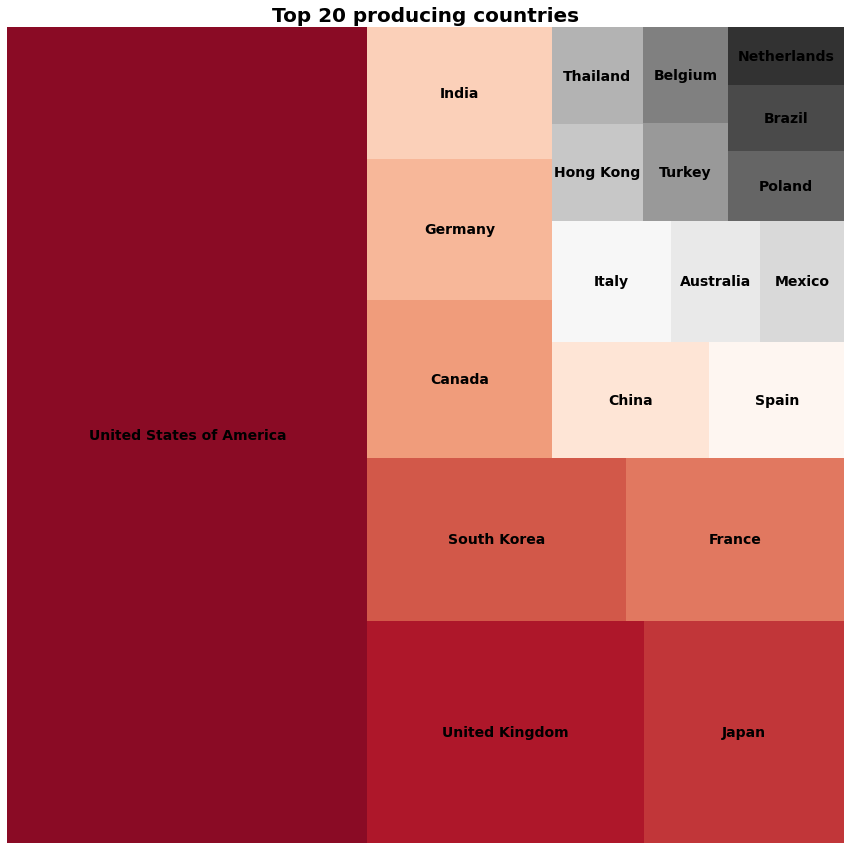

In [391]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import squarify

y = top20_country
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("RdGy", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 20 producing countries', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

In [403]:
%pip install "vegafusion[embed]>=1.4.0"

  Using cached vegafusion-1.4.3-py3-none-any.whl.metadata (1.3 kB)
  Using cached vegafusion_python_embed-1.4.3-cp38-abi3-macosx_10_7_x86_64.whl.metadata (394 bytes)
  Using cached vl_convert_python-1.1.0-cp37-abi3-macosx_10_7_x86_64.whl.metadata (5.2 kB)
Using cached vegafusion-1.4.3-py3-none-any.whl (43 kB)
Using cached vegafusion_python_embed-1.4.3-cp38-abi3-macosx_10_7_x86_64.whl (18.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.1/26.1 MB 1.5 MB/s eta 0:00:0000:0100:010m
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [404]:
import altair as alt
# Enable the VegaFusion data transformer
alt.data_transformers.enable('vegafusion')

DataTransformerRegistry.enable('vegafusion')

In [417]:
import pandas as pd
import altair as alt

# Assuming country_counting is your pd.Series from the previous code
country_counting = pd.Series({'United States of America': 25978, 'United Kingdom': 10889, 'Germany': 10596,
                              'Australia': 10133, 'Canada': 9456, 'Italy': 8241, 'Japan': 6594, 'India': 4723,
                              'France': 4674, 'Mexico': 4391, 'South Korea': 3672, 'China': 3376, 'Spain': 3266,
                              'Brazil': 3250, 'Russia': 3048, 'Argentina': 2881, 'Turkey': 2717, 'Netherlands': 1716,
                              'South Africa': 1030})

# Convert the Series to a DataFrame
df = pd.DataFrame({'country': country_counting.index, 'count': country_counting.values})

# Calculate the size of the square based on the count
# Create Altair chart
chart = alt.Chart(df).mark_square().encode(
    alt.X('country:N', title=''),
    alt.Y('count:Q'),
    size='count:Q',
    tooltip=['country:N', 'count:Q']
).properties(
    title='Top 20 Producing Countries',
    width=500,
    height=500
).configure_view(
    strokeWidth=0  # Remove border
)

# Display the chart
chart


alt.Chart(...)